In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import dask.array as da
import matplotlib.pyplot as plt

from nata.containers import GridArray
from nata.containers import Axis
from nata.plots import *

# Plot

By default, `.plot()` uses all available labels and/or units to build a figure.

In [3]:
x = np.linspace(start=-5, stop=+4, num=100)
grid = GridArray.from_array(
    np.sin(x)**2,
    label="y",
    unit="b",
    axes=[Axis.from_array(x, label="x", unit="a")]
)

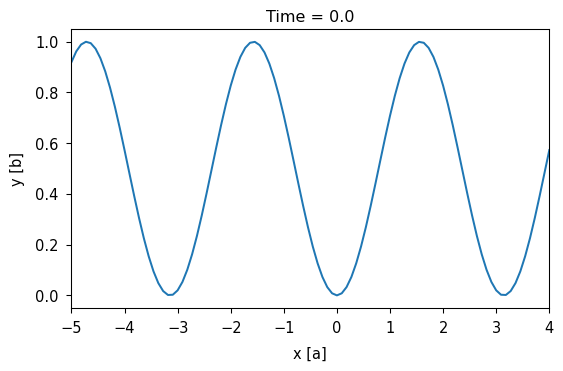

In [4]:
fig = grid.plot()
fig.show()

Figure parameters can be set with keyword arguments to `.plot()`.

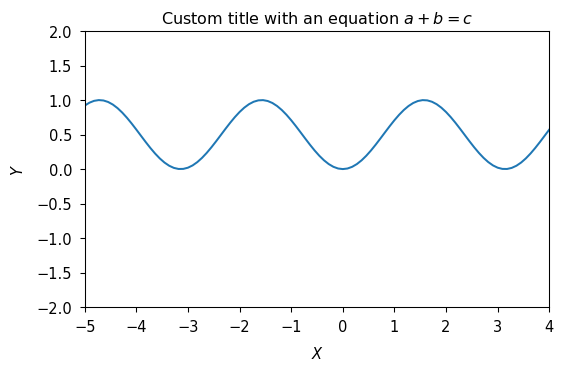

In [5]:
fig = grid.plot(
    title="Custom title with an equation $a + b = c$",
    xlabel="$X$",
    ylabel="$Y$",
    xrange=(-5,4),
    yrange=(-2,2),
)
fig.show()

Axes scales can be set using a string (`"linear"`, `"log"` or `"symlog"`).

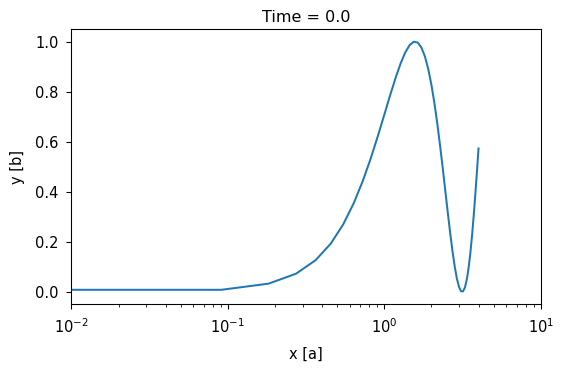

In [6]:
fig = grid.plot(
    xrange=(.01, 10),
    xscale="log"
)
fig.show()

Alternatively, `Scale` objects (`LinearScale`, `LogScale` and `SymmetricalLogScale`) are also available for more detailed plot customizations.

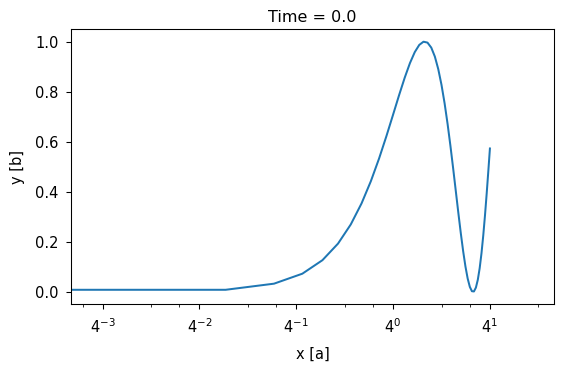

In [7]:
fig = grid.plot(
    xrange=(.01, 10),
    xscale=LogScale(base=4)
)
fig.show()

Axes ticks are also available via the keyword arguments `xticks` and `yticks`, that can receive any sequence representing the ticks' values.

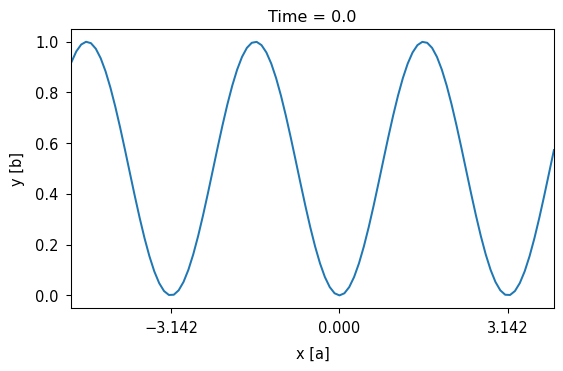

In [8]:
fig = grid.plot(
    xticks=(-np.pi, 0, np.pi)
)
fig.show()

Alternatively, `Ticks` objects can be passed to set both `values` and `labels`.

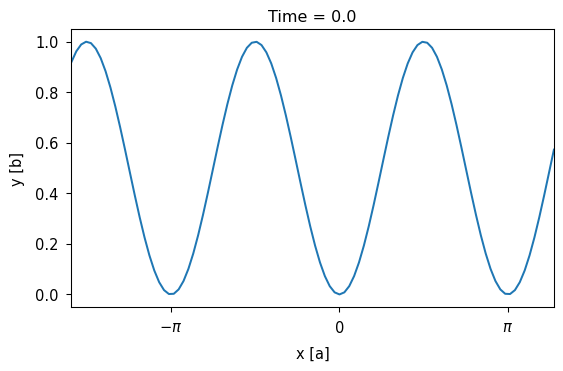

In [9]:
fig = grid.plot(
    xticks=Ticks(values=(-np.pi, 0, np.pi), labels=("$-\pi$", "$0$", "$\pi$"))
)
fig.show()

To set parameters specific to the desired plot kind, a `PlotKind` object should be passed to the keyword argument `kind`. Available plot kinds are `Line`, `Scatter` and `Image`.

In [10]:
x = np.linspace(start=-10, stop=+10, num=50)
grid = GridArray.from_array(
    np.exp(-(x/2)**2),
    label="y",
    unit="b",
    axes=[Axis.from_array(x, label="x", unit="a")]
)

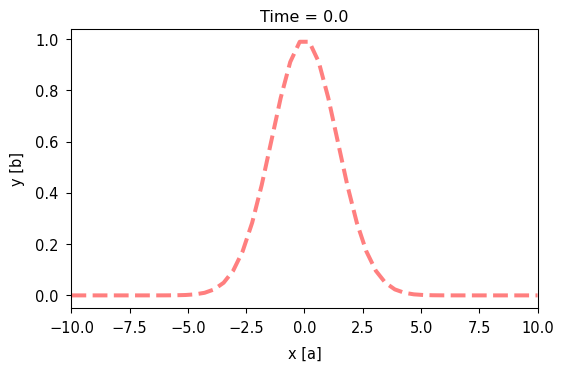

In [11]:
fig = grid.plot(
    kind=Line(color="red", style="dashed", width=3, alpha=.5)
)
fig.show()

`PlotKind` objects such as `Line` contain all styling options available for that plot kind.

In [12]:
Line?

Init signature:
Line(
    color: Union[str, NoneType] = None,
    style: Union[str, NoneType] = None,
    width: Union[int, float, NoneType] = None,
    alpha: Union[int, float, NoneType] = None,
) -> None
Docstring:      Line(color: Union[str, NoneType] = None, style: Union[str, NoneType] = None, width: Union[int, float, NoneType] = None, alpha: Union[int, float, NoneType] = None)
File:           /workspaces/nata-dev/nata/plots/kinds.py
Type:           type
Subclasses:     


The same `GridArray` can be plotted using different plot kinds. For example, the previous object `grid` can be plotted using a scatter plot.

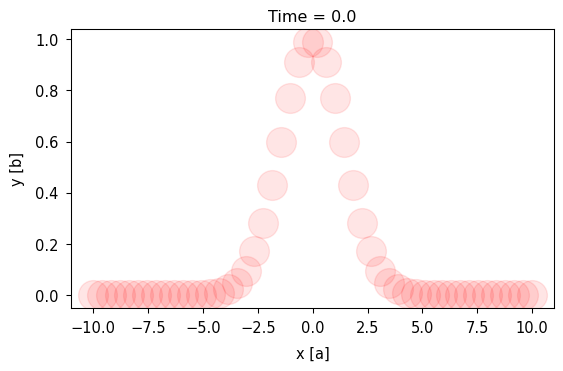

In [13]:
fig = grid.plot(
    kind=Scatter(color="red", style=".", size=2000, alpha=.1)
)
fig.show()

In [14]:
Scatter?

Init signature:
Scatter(
    color: Union[str, NoneType] = None,
    style: Union[str, NoneType] = None,
    size: Union[int, float, NoneType] = None,
    alpha: Union[int, float, NoneType] = None,
    colorbar: Union[nata.plots.elements.Colorbar, NoneType] = None,
) -> None
Docstring:      Scatter(color: Union[str, NoneType] = None, style: Union[str, NoneType] = None, size: Union[int, float, NoneType] = None, alpha: Union[int, float, NoneType] = None, colorbar: Union[nata.plots.elements.Colorbar, NoneType] = None)
File:           /workspaces/nata-dev/nata/plots/kinds.py
Type:           type
Subclasses:     


In [15]:
x = np.linspace(0, 10*np.pi, 101)
y = np.linspace(0, 10*np.pi, 201)

X,Y = np.meshgrid(x, y, indexing="ij")

grid = GridArray.from_array(
    np.sin(X) + np.sin(2*Y),
    name="dataset",
    label="$y$",
    unit="$y_a$",
    axes=[
        Axis.from_array(x, name="x1", label="$x_1$", unit="$a$"),
        Axis.from_array(y, name="x2", label="$x_2$", unit="$b$")
    ]
)

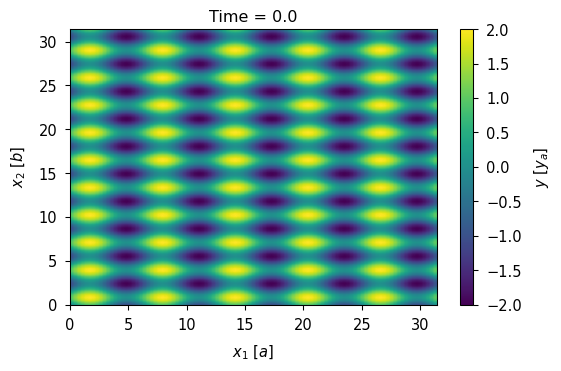

In [16]:
fig = grid.plot()
fig.show()

The colorbar of image plots can be customized by passing a `Colorbar` object to the keyword argument `colorbar`.

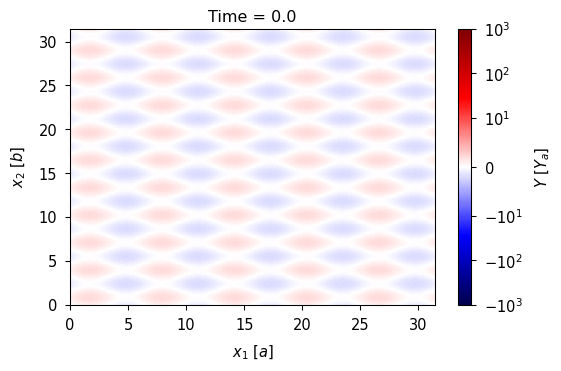

In [17]:
fig = grid.plot(
    kind=Image(
        crange=(-1e3,1e3),
        cmap="seismic",
        cscale=SymmetricalLogScale(linthresh=10),
        colorbar=Colorbar(label="$Y$ [$Y_a$]", ticks=(-1e3, -1e2, -1e1, 0, 1e1, 1e2, 1e3))
    ),
)
fig.show()